In [118]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [440]:
%load_ext autoreload
%autoreload 1
%aimport cooking_session
%run cooking_session.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [441]:
# Packages
import pandas as pd
import numpy as np

In [442]:
# Source file
df_raw = pd.read_csv('dataframe_raw.csv', sep=',')

In [443]:
df_raw = remove_spikes(df_raw)
df_processed = cooking_event(df_raw)
df_epc = timestamp_issue(df_processed)
df_epc = addtoevent_ending(df_epc)
df_epc = addtoevent_beginning(df_epc)
df_only_events = only_events(df_epc)
df_period = period(df_only_events)

In [444]:
df_epc = df_epc.drop(['fetch_index',\
                  'timestamp_issue', 'diff_next_timestamp', 'diff_prev_timestamp', 'energy_gap_time_datetime', 
                                 'timestamp_load','energy_gap_to_next','energy_gap_to_prev','load'], axis=1)

In [445]:
df_epc = cooking_event(df_epc)

In [446]:
df_epc.

,id,meter_number,timezone,region,energy,voltage,current,power,power_factor,frequency,...,energy_start,time_end,energy_end,cooking_time,seq_time,energy_gap_time,load,timestamp_load,diff_next_timestamp,diff_prev_timestamp
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-03-10 18:50:00.000000000,311,546281,UTC+00:00,TZ cooking pilot,0.00,229.9,0.000,0.000000,1.000,50.00,...,0.00,2020-03-10 19:04:11.999999999,0.21,14.2,0.0,NaN,NaN,2020-03-10 18:50:00.000000000,0 days 00:05:00,NaT
2020-03-10 18:55:00.000000000,311,546281,UTC+00:00,TZ cooking pilot,0.07,228.2,4.301,0.981488,0.999,50.01,...,0.00,2020-03-10 19:04:11.999999999,0.21,14.2,5.0,NaN,0.07,2020-03-10 18:55:00.000000000,0 days 00:05:00,0 days 00:05:00
2020-03-10 19:00:00.000000000,311,546281,UTC+00:00,TZ cooking pilot,0.14,227.8,4.309,0.981590,0.998,50.01,...,0.00,2020-03-10 19:04:11.999999999,0.21,14.2,10.0,NaN,0.07,2020-03-10 19:00:00.000000000,0 days 00:04:11.999999999,0 days 00:05:00
2020-03-10 19:04:11.999999999,311,546281,UTC+00:00,TZ cooking pilot,0.21,227.8,4.309,0.981590,0.998,50.01,...,0.00,2020-03-10 19:04:11.999999999,0.21,14.2,14.2,0.0,0.07,2020-03-10 19:04:11.999999999,0 days 01:00:48.000000001,0 days 00:04:11.999999999
2020-03-10 20:05:00.000000000,311,546281,UTC+00:00,TZ cooking pilot,0.21,229.9,0.000,0.000000,1.000,50.01,...,0.21,2020-03-10 20:05:00.000000000,0.21,NaN,NaN,NaN,NaN,2020-03-10 19:04:11.999999999,0 days 09:42:00,0 days 01:00:48.000000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-19 05:30:00.000000000,219,546380,UTC+00:00,TZ cooking pilot,5.00,229.9,0.028,0.006437,0.828,50.01,...,5.00,2020-11-19 05:30:00.000000000,5.00,NaN,NaN,NaN,NaN,2020-11-18 16:30:00.000000000,0 days 00:05:00,0 days 00:05:00
2020-11-19 05:35:00.000000000,219,546380,UTC+00:00,TZ cooking pilot,5.00,221.1,0.028,0.006191,0.826,50.01,...,5.00,2020-11-19 05:35:00.000000000,5.00,NaN,NaN,NaN,NaN,2020-11-18 16:30:00.000000000,0 days 00:05:00,0 days 00:05:00
2020-11-19 05:40:00.000000000,219,546380,UTC+00:00,TZ cooking pilot,5.00,220.1,0.031,0.006823,0.838,50.01,...,5.00,2020-11-19 05:40:00.000000000,5.00,NaN,NaN,NaN,NaN,2020-11-18 16:30:00.000000000,0 days 00:05:00,0 days 00:05:00


In [359]:
import matplotlib                                      
import datetime as dt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)  
import matplotlib.pyplot as plt                         
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU 
import matplotlib.dates as mdates                       
import matplotlib.ticker as ticker                      
import matplotlib.patches as mpatches                   
import pylab                                            
from pylab import rcParams                              
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('xtick', labelsize=14.5)
plt.rc('ytick', labelsize=14) 
plt.rc('axes', axisbelow=True, labelsize=14)
plt.rc('legend', fontsize=10)

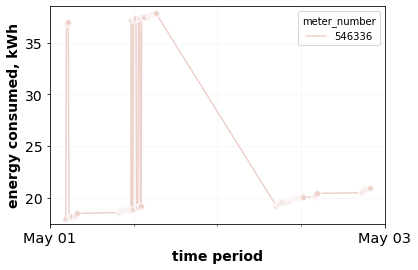

In [360]:
%matplotlib inline
df_raw_period = df_raw.copy()
df_raw_period = cooking_session.period(df_raw_period, '2020-05-01', '2020-05-03')
df_raw_period_meter = df_raw_period.loc[df_raw_period['meter_number']==546336]
df_plot = df_raw_period_meter.copy()
df_plot.reset_index(inplace=True)
g = sns.lineplot(x='timestamp', y='energy', data=df_plot, hue='meter_number', marker="o", legend='full')
formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
plt.gca().set_ylim(17.5,38.5)
plt.ylabel('energy consumed, kWh', fontstyle='normal', fontweight='bold')
plt.xlabel('time period', fontstyle='normal', fontweight='bold')
plt.grid(True, which='both', color='whitesmoke')
plt.show()

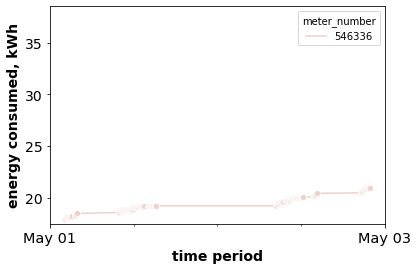

In [361]:
df_raw_period = df_raw.copy()
df_raw_period = cooking_session.remove_spikes(df_raw_period)
df_raw_period = cooking_session.period(df_raw_period, '2020-05-01', '2020-05-03')
df_raw_period_meter = df_raw_period.loc[df_raw_period['meter_number']==546336]

plt.ylabel('energy consumed, kWh', fontstyle='normal', fontweight='bold')
plt.xlabel('time period', fontstyle='normal', fontweight='bold')

sns.lineplot(x='timestamp', y='energy', data=df_raw_period_meter, hue='meter_number', marker="o", legend='full')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
plt.gca().set_ylim(17.5,38.5)
plt.show()

## Spikes

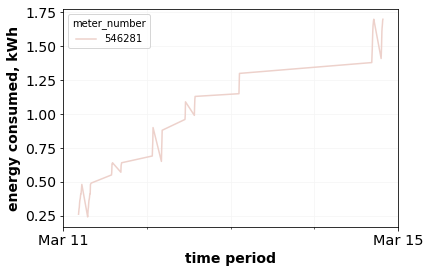

In [362]:
df_raw_period = df_raw.copy()
#df_raw_period = cooking_session.remove_spikes(df_raw_period)
df_raw_period = cooking_session.period(df_raw_period, '2020-03-11', '2020-03-16')
df_raw_period_meter = df_raw_period.loc[df_raw_period['meter_number']==546281]

plt.ylabel('energy consumed, kWh', fontstyle='normal', fontweight='bold')
plt.xlabel('time period', fontstyle='normal', fontweight='bold')

sns.lineplot(x='timestamp', y='energy', data=df_raw_period_meter, hue='meter_number', marker=None, legend='full')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
plt.grid(True, which='both', color='whitesmoke')
plt.show()

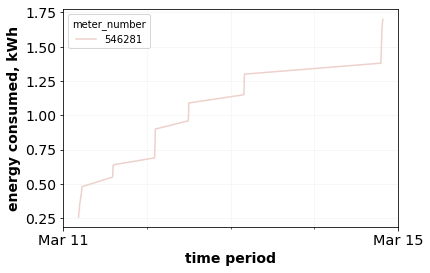

In [365]:
df_epc_period = df_epc.copy()
df_epc_period = cooking_session.period(df_epc_period, '2020-03-11', '2020-03-16')
df_epc_period_meter = df_epc_period.loc[df_epc_period['meter_number']==546281]
df_plot = df_epc_period_meter.copy()
df_plot.reset_index(inplace=True)
g = sns.lineplot(x='timestamp', y='energy', data=df_plot, hue='meter_number', marker=None, legend='full')
formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
#plt.gca().set_ylim(17.5,38.5)
plt.ylabel('energy consumed, kWh', fontstyle='normal', fontweight='bold')
plt.xlabel('time period', fontstyle='normal', fontweight='bold')
plt.grid(True, which='both', color='whitesmoke')

In [346]:
df_raw_meter = df_raw.loc[df_raw['meter_number']==546377]

In [347]:
df_raw_meter

,timestamp,id,meter_number,timezone,region,fetch_index,energy,voltage,current,power,power_factor,frequency
102001,2020-03-05 06:45:00,233,546377,UTC+00:00,TZ cooking pilot,19,0.01,227.5,0.000,0.000000,1.0,50.01
102002,2020-03-05 06:50:00,233,546377,UTC+00:00,TZ cooking pilot,19,0.08,227.7,4.145,0.943816,1.0,50.01
102003,2020-03-05 06:55:00,233,546377,UTC+00:00,TZ cooking pilot,19,0.16,227.8,4.157,0.946965,1.0,50.01
102004,2020-03-05 07:00:00,233,546377,UTC+00:00,TZ cooking pilot,19,0.24,227.6,4.159,0.946588,1.0,50.01
102005,2020-03-05 07:05:00,233,546377,UTC+00:00,TZ cooking pilot,19,0.30,227.1,4.156,0.943828,1.0,50.01
...,...,...,...,...,...,...,...,...,...,...,...,...
104334,2020-11-24 14:25:00,233,546377,UTC+00:00,TZ cooking pilot,19,38.23,228.8,0.000,0.000000,1.0,50.00
104335,2020-11-24 14:30:00,233,546377,UTC+00:00,TZ cooking pilot,19,38.23,228.9,0.000,0.000000,1.0,50.01
104336,2020-11-24 14:35:00,233,546377,UTC+00:00,TZ cooking pilot,19,38.23,230.3,0.000,0.000000,1.0,50.01
104337,2020-11-24 14:40:00,233,546377,UTC+00:00,TZ cooking pilot,19,38.23,228.9,0.000,0.000000,1.0,50.00


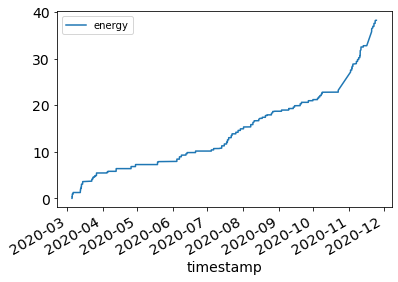

In [342]:
df_epc_meter = df_epc.loc[df_epc['meter_number']==546377]
df_epc_meter.plot(x='timestamp', y='energy')
plt.show()

In [343]:
df_epc_meter = df_epc_meter.drop(['level_0', 'index','timezone','fetch_index','voltage','power_factor','frequency','load_count',\
                  'timestamp_issue', 'diff_next_timestamp', 'diff_prev_timestamp', 'energy_gap_time_datetime', 
                                 'region', 'timestamp_load','meter_number','energy_gap_to_next','energy_gap_to_prev','load'], axis=1)
df_epc_meter.set_index('timestamp',inplace=True)

In [344]:
df_epc_meter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2393 entries, 2020-03-05 09:45:00 to 2020-11-23 15:39:24.000000001
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2393 non-null   int64         
 1   energy              2393 non-null   float64       
 2   current             2393 non-null   float64       
 3   power               2393 non-null   float64       
 4   load                742 non-null    float64       
 5   cooking_start       2393 non-null   bool          
 6   cooking_end         2393 non-null   bool          
 7   cooking_event       635 non-null    float64       
 8   time_start          2393 non-null   datetime64[ns]
 9   energy_start        2393 non-null   float64       
 10  time_end            2393 non-null   datetime64[ns]
 11  energy_end          2393 non-null   float64       
 12  cooking_time        635 non-null    float64       
 13  se

In [350]:
df_epc_meter.reset_index(inplace=True)

In [355]:
df_epc_meter.sort_values(by=['id','timestamp'],inplace=True)

In [353]:
df_epc_meter.to_csv('hej.csv', sep=',', index=False)

In [ ]:
#546377 STRANGE!

In [375]:
df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'timestamp'] += df_epc_energy_gaps.energy_gap_time_datetime

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'time_end'] += df_epc_energy_gaps.energy_gap_time_datetime

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'cooking_time'] += df_epc_energy_gaps.energy_gap_time

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'seq_time'] += df_epc_energy_gaps.energy_gap_time

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'energy_gap_time'] = 0

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'energy_gap_time_datetime'] = 0

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'energy'] += df_epc_energy_gaps.energy_gap_to_next

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'energy_end'] += df_epc_energy_gaps.energy_gap_to_next


df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time > 5)
            , 'timestamp'] += pd.Timedelta(minutes=5)


df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time > 5)
            , 'time_end'] += pd.Timedelta(minutes=5)

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time > 5)
            , 'cooking_time'] += 5

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time > 5)
            , 'seq_time'] += 5

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time > 5)
            , 'energy_gap_time'] -= 5

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time > 5)
            , 'energy'] += 5/60

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time > 5)
            , 'energy_end'] -= 5/60

In [376]:
df_epc_energy_gaps.energy_gap_time_datetime = df_epc_energy_gaps.energy_gap_time * 60 * np.timedelta64(1, 's')


In [377]:
df_epc_energy_gaps.energy_gap_to_next.sum()

340.3600000000001

In [378]:
df_epc = df_epc.append(df_epc_energy_gaps)

df_epc['time_end'] = df_epc.cooking_event.map(
    df_epc_energy_gaps.set_index('cooking_event')['time_end'].to_dict())
df_epc['cooking_time'] = df_epc.cooking_event.map(
    df_epc_energy_gaps.set_index('cooking_event')['cooking_time'].to_dict())
df_epc['energy_end'] = df_epc.cooking_event.map(
    df_epc_energy_gaps.set_index('cooking_event')['energy_end'].to_dict())


In [379]:
df_epc.sort_values(by=['meter_number','timestamp'], ascending=[True,True]).head(20)

,timestamp,id,meter_number,timezone,region,fetch_index,energy,voltage,current,power,...,time_start,energy_start,time_end,energy_end,cooking_time,seq_time,timestamp_issue,energy_gap_to_next,energy_gap_time,energy_gap_time_datetime
0,2020-03-10 21:50:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.00,229.900000,0.000000,0.000000,...,2020-03-10 21:50:00,0.00,2020-03-10 22:04:11.999999999,0.21,14.2,0.0,NaN,NaN,NaN,NaT
1,2020-03-10 21:55:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.07,228.200000,4.301000,0.981488,...,2020-03-10 21:50:00,0.00,2020-03-10 22:04:11.999999999,0.21,14.2,5.0,NaN,NaN,NaN,NaT
2,2020-03-10 22:00:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.14,227.800000,4.309000,0.981590,...,2020-03-10 21:50:00,0.00,2020-03-10 22:04:11.999999999,0.21,14.2,10.0,NaN,0.07,NaN,NaT
2,2020-03-10 22:04:11.999999999,311,546281,UTC+03:00,TZ cooking pilot,97,0.21,227.800000,4.309000,0.981590,...,2020-03-10 21:50:00,0.00,2020-03-10 22:04:11.999999999,0.21,14.2,14.2,NaN,0.07,0.0,0 days
3,2020-03-10 23:05:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.21,229.900000,0.000000,0.000000,...,2020-03-10 23:05:00,0.21,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2020-03-11 08:50:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.26,228.850000,2.153500,0.492828,...,2020-03-11 08:50:00,0.26,2020-03-11 09:59:12.000000000,0.55,69.2,0.0,NaN,NaN,NaN,NaT
5,2020-03-11 08:55:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.28,228.900000,2.167000,0.496026,...,2020-03-11 08:50:00,0.26,2020-03-11 09:59:12.000000000,0.55,69.2,5.0,NaN,NaN,NaN,NaT
6,2020-03-11 09:00:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.30,229.250000,2.170000,0.497472,...,2020-03-11 08:50:00,0.26,2020-03-11 09:59:12.000000000,0.55,69.2,10.0,NaN,NaN,NaN,NaT
7,2020-03-11 09:05:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.31,228.666667,4.328333,0.989746,...,2020-03-11 08:50:00,0.26,2020-03-11 09:59:12.000000000,0.55,69.2,15.0,NaN,NaN,NaN,NaT
8,2020-03-11 09:10:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.34,229.100000,3.946500,0.904143,...,2020-03-11 08:50:00,0.26,2020-03-11 09:59:12.000000000,0.55,69.2,20.0,NaN,NaN,NaN,NaT


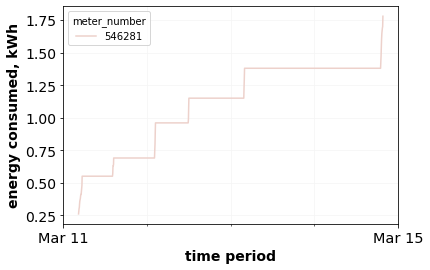

In [380]:
df_epc_period = df_epc.copy()
df_epc_period = cooking_session.period(df_epc_period, '2020-03-11', '2020-03-16')
df_epc_period_meter = df_epc_period.loc[df_epc_period['meter_number']==546281]
df_plot = df_epc_period_meter.copy()
df_plot.reset_index(inplace=True)
g = sns.lineplot(x='timestamp', y='energy', data=df_plot, hue='meter_number', marker=None, legend='full')
formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
#plt.gca().set_ylim(17.5,38.5)
plt.ylabel('energy consumed, kWh', fontstyle='normal', fontweight='bold')
plt.xlabel('time period', fontstyle='normal', fontweight='bold')
plt.grid(True, which='both', color='whitesmoke')

In [308]:
df_epc_meter = df_epc.loc[df_epc['meter_number']==546301]

In [381]:
df_epc.sort_values(by=['cooking_time','timestamp','meter_number'], ascending=[False,True,True]).head(20)

,timestamp,id,meter_number,timezone,region,fetch_index,energy,voltage,current,power,...,time_start,energy_start,time_end,energy_end,cooking_time,seq_time,timestamp_issue,energy_gap_to_next,energy_gap_time,energy_gap_time_datetime
16346,2020-11-04 13:15:00,239,546296,UTC+03:00,TZ cooking pilot,25,22.09,225.3,4.126,0.929588,...,2020-11-04 13:15:00,22.09,2020-11-04 16:19:47.999999999,24.34,184.8,0.0,NaN,NaN,NaN,NaT
16347,2020-11-04 13:20:00,239,546296,UTC+03:00,TZ cooking pilot,25,22.17,225.3,4.121,0.928461,...,2020-11-04 13:15:00,22.09,2020-11-04 16:19:47.999999999,24.34,184.8,5.0,NaN,NaN,NaN,NaT
16348,2020-11-04 13:25:00,239,546296,UTC+03:00,TZ cooking pilot,25,22.24,225.5,4.124,0.929962,...,2020-11-04 13:15:00,22.09,2020-11-04 16:19:47.999999999,24.34,184.8,10.0,NaN,NaN,NaN,NaT
16349,2020-11-04 13:30:00,239,546296,UTC+03:00,TZ cooking pilot,25,22.32,225.3,4.119,0.928011,...,2020-11-04 13:15:00,22.09,2020-11-04 16:19:47.999999999,24.34,184.8,15.0,NaN,NaN,NaN,NaT
16350,2020-11-04 13:35:00,239,546296,UTC+03:00,TZ cooking pilot,25,22.39,225.1,4.112,0.925611,...,2020-11-04 13:15:00,22.09,2020-11-04 16:19:47.999999999,24.34,184.8,20.0,NaN,NaN,NaN,NaT
16351,2020-11-04 13:40:00,239,546296,UTC+03:00,TZ cooking pilot,25,22.47,225.2,4.115,0.926698,...,2020-11-04 13:15:00,22.09,2020-11-04 16:19:47.999999999,24.34,184.8,25.0,NaN,NaN,NaN,NaT
16352,2020-11-04 13:45:00,239,546296,UTC+03:00,TZ cooking pilot,25,22.54,225.0,4.121,0.927225,...,2020-11-04 13:15:00,22.09,2020-11-04 16:19:47.999999999,24.34,184.8,30.0,NaN,NaN,NaN,NaT
16353,2020-11-04 13:50:00,239,546296,UTC+03:00,TZ cooking pilot,25,22.55,228.7,0.000,0.000000,...,2020-11-04 13:15:00,22.09,2020-11-04 16:19:47.999999999,24.34,184.8,35.0,NaN,NaN,NaN,NaT
16354,2020-11-04 14:00:00,239,546296,UTC+03:00,TZ cooking pilot,25,22.60,222.9,4.069,0.906980,...,2020-11-04 13:15:00,22.09,2020-11-04 16:19:47.999999999,24.34,184.8,45.0,NaN,NaN,NaN,NaT
16355,2020-11-04 14:05:00,239,546296,UTC+03:00,TZ cooking pilot,25,22.68,225.3,4.114,0.926884,...,2020-11-04 13:15:00,22.09,2020-11-04 16:19:47.999999999,24.34,184.8,50.0,NaN,NaN,NaN,NaT


In [382]:
df_epc.sort_values(by=['meter_number','timestamp'], ascending=[True,True], inplace=True)

In [383]:
df_epc.cooking_event.nunique()

5365

In [384]:
df_epc.reset_index(inplace=True)

In [385]:
df_epc.loc[
            (
                (df_epc.cooking_event.isnull() == False)
                & (df_epc.cooking_event != df_epc.cooking_event.shift())
                & (df_epc.meter_number == df_epc.meter_number.shift())
            ), 'energy_gap_to_prev'] = df_epc.energy.diff()

df_epc_energy_gaps = df_epc.copy()
df_epc_energy_gaps = df_epc_energy_gaps.loc[df_epc['energy_gap_to_prev']>0]

df_epc_energy_gaps['energy_gap_time'] = df_epc.energy_gap_to_prev / power_capacity * 60
df_epc_energy_gaps['energy_gap_time_datetime'] = df_epc_energy_gaps['energy_gap_time'] * 60 * np.timedelta64(1, 's')

df_epc_energy_gaps.loc[
            (df_epc_energy_gaps.energy_gap_time <= 5)
        , 'timestamp'] -= df_epc_energy_gaps.energy_gap_time_datetime

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'time_start'] -= df_epc_energy_gaps.energy_gap_time_datetime

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'cooking_time'] += df_epc_energy_gaps.energy_gap_time

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'seq_time'] -= df_epc_energy_gaps.energy_gap_time

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'energy_gap_time'] = 0

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'energy_gap_time_datetime'] = 0

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'energy'] -= df_epc_energy_gaps.energy_gap_to_prev

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time <= 5)
            , 'energy_start'] -= df_epc_energy_gaps.energy_gap_to_prev

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time > 5)
            , 'timestamp'] -= pd.Timedelta(minutes=5)

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time > 5)
            , 'time_start'] -= pd.Timedelta(minutes=5)

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time > 5)
            , 'cooking_time'] += 5

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time > 5)
            , 'seq_time'] -= 5

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time > 5)
            , 'energy_gap_time'] -= 5

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time > 5)
            , 'energy'] -= 5/60

df_epc_energy_gaps.loc[
                (df_epc_energy_gaps.energy_gap_time > 5)
            , 'energy_start'] -= 5/60

df_epc_energy_gaps.energy_gap_time_datetime = df_epc_energy_gaps.energy_gap_time * 60 * np.timedelta64(1, 's')

df_epc = df_epc.append(df_epc_energy_gaps)

df_epc['time_start'] = df_epc.cooking_event.map(
    df_epc_energy_gaps.set_index('cooking_event')['time_start'].to_dict())
df_epc['cooking_time'] = df_epc.cooking_event.map(
    df_epc_energy_gaps.set_index('cooking_event')['cooking_time'].to_dict())
df_epc['energy_start'] = df_epc.cooking_event.map(
    df_epc_energy_gaps.set_index('cooking_event')['energy_start'].to_dict())

df_epc.sort_values(by=['meter_number','timestamp'], ascending=[True,True]).head(20)

,index,timestamp,id,meter_number,timezone,region,fetch_index,energy,voltage,current,...,energy_start,time_end,energy_end,cooking_time,seq_time,timestamp_issue,energy_gap_to_next,energy_gap_time,energy_gap_time_datetime,energy_gap_to_prev
0,0,2020-03-10 21:50:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.00,229.900000,0.000000,...,NaN,2020-03-10 22:04:11.999999999,0.21,NaN,0.0,NaN,NaN,NaN,NaT,NaN
1,1,2020-03-10 21:55:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.07,228.200000,4.301000,...,NaN,2020-03-10 22:04:11.999999999,0.21,NaN,5.0,NaN,NaN,NaN,NaT,NaN
2,2,2020-03-10 22:00:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.14,227.800000,4.309000,...,NaN,2020-03-10 22:04:11.999999999,0.21,NaN,10.0,NaN,0.07,NaN,NaT,NaN
3,2,2020-03-10 22:04:11.999999999,311,546281,UTC+03:00,TZ cooking pilot,97,0.21,227.800000,4.309000,...,NaN,2020-03-10 22:04:11.999999999,0.21,NaN,14.2,NaN,0.07,0.0,0 days,NaN
4,3,2020-03-10 23:05:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.21,229.900000,0.000000,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
5,4,2020-03-11 08:47:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.21,228.850000,2.153500,...,0.21,2020-03-11 09:59:12.000000000,0.55,72.2,-3.0,NaN,NaN,0.0,0 days,0.05
5,4,2020-03-11 08:50:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.26,228.850000,2.153500,...,0.21,2020-03-11 09:59:12.000000000,0.55,72.2,0.0,NaN,NaN,NaN,NaT,0.05
6,5,2020-03-11 08:55:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.28,228.900000,2.167000,...,0.21,2020-03-11 09:59:12.000000000,0.55,72.2,5.0,NaN,NaN,NaN,NaT,NaN
7,6,2020-03-11 09:00:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.30,229.250000,2.170000,...,0.21,2020-03-11 09:59:12.000000000,0.55,72.2,10.0,NaN,NaN,NaN,NaT,NaN
8,7,2020-03-11 09:05:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.31,228.666667,4.328333,...,0.21,2020-03-11 09:59:12.000000000,0.55,72.2,15.0,NaN,NaN,NaN,NaT,NaN


In [386]:
df_epc.sort_values(by=['meter_number','timestamp'], ascending=[True,True]).head(20)

,index,timestamp,id,meter_number,timezone,region,fetch_index,energy,voltage,current,...,energy_start,time_end,energy_end,cooking_time,seq_time,timestamp_issue,energy_gap_to_next,energy_gap_time,energy_gap_time_datetime,energy_gap_to_prev
0,0,2020-03-10 21:50:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.00,229.900000,0.000000,...,NaN,2020-03-10 22:04:11.999999999,0.21,NaN,0.0,NaN,NaN,NaN,NaT,NaN
1,1,2020-03-10 21:55:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.07,228.200000,4.301000,...,NaN,2020-03-10 22:04:11.999999999,0.21,NaN,5.0,NaN,NaN,NaN,NaT,NaN
2,2,2020-03-10 22:00:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.14,227.800000,4.309000,...,NaN,2020-03-10 22:04:11.999999999,0.21,NaN,10.0,NaN,0.07,NaN,NaT,NaN
3,2,2020-03-10 22:04:11.999999999,311,546281,UTC+03:00,TZ cooking pilot,97,0.21,227.800000,4.309000,...,NaN,2020-03-10 22:04:11.999999999,0.21,NaN,14.2,NaN,0.07,0.0,0 days,NaN
4,3,2020-03-10 23:05:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.21,229.900000,0.000000,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
5,4,2020-03-11 08:47:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.21,228.850000,2.153500,...,0.21,2020-03-11 09:59:12.000000000,0.55,72.2,-3.0,NaN,NaN,0.0,0 days,0.05
5,4,2020-03-11 08:50:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.26,228.850000,2.153500,...,0.21,2020-03-11 09:59:12.000000000,0.55,72.2,0.0,NaN,NaN,NaN,NaT,0.05
6,5,2020-03-11 08:55:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.28,228.900000,2.167000,...,0.21,2020-03-11 09:59:12.000000000,0.55,72.2,5.0,NaN,NaN,NaN,NaT,NaN
7,6,2020-03-11 09:00:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.30,229.250000,2.170000,...,0.21,2020-03-11 09:59:12.000000000,0.55,72.2,10.0,NaN,NaN,NaN,NaT,NaN
8,7,2020-03-11 09:05:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.31,228.666667,4.328333,...,0.21,2020-03-11 09:59:12.000000000,0.55,72.2,15.0,NaN,NaN,NaN,NaT,NaN


In [387]:
df_epc.tail(60)

,index,timestamp,id,meter_number,timezone,region,fetch_index,energy,voltage,current,...,energy_start,time_end,energy_end,cooking_time,seq_time,timestamp_issue,energy_gap_to_next,energy_gap_time,energy_gap_time_datetime,energy_gap_to_prev
104052,101660,2020-07-19 09:52:00.000000001,233,546377,UTC+03:00,TZ cooking pilot,19,12.570000,227.3,4.167,...,12.570000,2020-07-19 10:09:48.000000000,12.850000,17.8,-3.0,NaN,NaN,0.0,0 days 00:00:00,0.050000
104065,101672,2020-07-19 11:10:12.000000000,233,546377,UTC+03:00,TZ cooking pilot,19,12.860000,227.5,4.173,...,12.860000,NaT,NaN,NaN,-4.8,NaN,NaN,0.0,0 days 00:00:00,0.080000
104073,101680,2020-07-21 15:29:24.000000001,233,546377,UTC+03:00,TZ cooking pilot,19,13.030000,227.2,4.172,...,13.030000,NaT,NaN,NaN,-0.6,NaN,NaN,0.0,0 days 00:00:00,0.010000
104096,101703,2020-07-22 08:49:24.000000001,233,546377,UTC+03:00,TZ cooking pilot,19,13.480000,226.7,4.168,...,13.480000,NaT,NaN,NaN,-0.6,NaN,NaN,0.0,0 days 00:00:00,0.010000
104102,101709,2020-07-22 10:04:24.000000001,233,546377,UTC+03:00,TZ cooking pilot,19,13.740000,227.1,4.172,...,13.740000,NaT,NaN,NaN,-0.6,NaN,NaN,0.0,0 days 00:00:00,0.010000
104119,101726,2020-07-25 15:33:12.000000000,233,546377,UTC+03:00,TZ cooking pilot,19,13.860000,226.9,4.164,...,13.860000,NaT,NaN,NaN,-1.8,NaN,NaN,0.0,0 days 00:00:00,0.030000
104141,101748,2020-07-27 14:57:36.000000000,233,546377,UTC+03:00,TZ cooking pilot,19,14.190000,227.0,4.169,...,14.190000,NaT,NaN,NaN,-2.4,NaN,NaN,0.0,0 days 00:00:00,0.040000
104170,101777,2020-07-29 14:27:00.000000000,233,546377,UTC+03:00,TZ cooking pilot,19,14.590000,227.2,4.170,...,14.590000,NaT,NaN,NaN,-3.0,NaN,NaN,0.0,0 days 00:00:00,0.050000
104192,101799,2020-08-01 08:24:24.000000001,233,546377,UTC+03:00,TZ cooking pilot,19,14.930000,226.9,4.168,...,14.930000,NaT,NaN,NaN,-0.6,NaN,NaN,0.0,0 days 00:00:00,0.010000
104218,101825,2020-08-07 14:23:48.000000001,233,546377,UTC+03:00,TZ cooking pilot,19,15.330000,227.0,4.168,...,15.330000,NaT,NaN,NaN,-1.2,NaN,NaN,0.0,0 days 00:00:00,0.020000


In [389]:
df_epc.reset_index(inplace=True)

In [390]:
df_epc.loc[
            (
                (df_epc.cooking_event.isnull() == False)
                & (df_epc.cooking_event != df_epc.cooking_event.shift(-1))
                & (df_epc.meter_number == df_epc.meter_number.shift(-1))
            ), 'gaps_to_next_server_issue'] = df_epc.energy.shift(-1) - df_epc.energy

In [391]:
df_epc

,level_0,index,timestamp,id,meter_number,timezone,region,fetch_index,energy,voltage,...,time_end,energy_end,cooking_time,seq_time,timestamp_issue,energy_gap_to_next,energy_gap_time,energy_gap_time_datetime,energy_gap_to_prev,gaps_to_next_server_issue
0,0,0,2020-03-10 21:50:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.00,229.9,...,2020-03-10 22:04:11.999999999,0.21,NaN,0.0,NaN,NaN,NaN,NaT,NaN,NaN
1,1,1,2020-03-10 21:55:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.07,228.2,...,2020-03-10 22:04:11.999999999,0.21,NaN,5.0,NaN,NaN,NaN,NaT,NaN,NaN
2,2,2,2020-03-10 22:00:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.14,227.8,...,2020-03-10 22:04:11.999999999,0.21,NaN,10.0,NaN,0.07,NaN,NaT,NaN,NaN
3,3,2,2020-03-10 22:04:11.999999999,311,546281,UTC+03:00,TZ cooking pilot,97,0.21,227.8,...,2020-03-10 22:04:11.999999999,0.21,NaN,14.2,NaN,0.07,0.0,0 days 00:00:00,NaN,0.00
4,4,3,2020-03-10 23:05:00.000000000,311,546281,UTC+03:00,TZ cooking pilot,97,0.21,229.9,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109818,106189,103765,2020-03-29 21:26:24.000000000,216,546379,UTC+03:00,TZ cooking pilot,2,2.04,224.9,...,2020-03-29 21:45:36.000000000,2.35,19.2,-3.6,NaN,NaN,0.0,0 days 00:00:00,0.06,NaN
109819,106616,104191,2020-04-01 11:42:00.000000001,219,546380,UTC+03:00,TZ cooking pilot,5,0.53,226.9,...,NaT,NaN,NaN,-3.0,NaN,NaN,0.0,0 days 00:00:00,0.05,0.39
109820,106646,104221,2020-04-01 14:23:12.000000001,219,546380,UTC+03:00,TZ cooking pilot,5,0.92,226.9,...,NaT,NaN,NaN,-1.8,NaN,NaN,0.0,0 days 00:00:00,0.03,0.66
109821,106657,104232,2020-04-01 15:15:00.000000000,219,546380,UTC+03:00,TZ cooking pilot,5,1.58,226.8,...,NaT,NaN,NaN,-5.0,NaN,NaN,0.4,0 days 00:00:24,0.09,1.81
